In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os
import cv2

In [2]:
#DIR = os.path.join(HOME, 'programming', 'dk39')
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/MD589'
MASKS = os.path.join(DIR, 'preps', 'masked')
CLEANED = os.path.join(DIR, 'preps', 'CH2', 'cleaned')
INPUT = os.path.join(DIR, 'preps', 'CH2', 'thumbnail')
OUTPUT = CLEANED
files = sorted(os.listdir(INPUT))
masks = sorted(os.listdir(MASKS))

In [17]:
def place_image(img, max_width, max_height):
    zmidr = max_height // 2
    zmidc = max_width // 2
    startr = zmidr - (img.shape[0] // 2)
    endr = startr + img.shape[0]
    startc = zmidc - (img.shape[1] // 2)
    endc = startc + img.shape[1]
    new_img = np.ones([max_height, max_width]) * 255
    try:
        new_img[startr:endr,startc:endc] = img
    except:
        print('could not create new img', file, img.shape)
        
    return new_img

In [4]:
dels = os.listdir(OUTPUT)
for d in dels:
    os.unlink(os.path.join(OUTPUT, d))

In [40]:
# get oriented for comparison
max_width = 1400
max_height = 900

img_inputs = []
img_outputs = []
file_inputs = []
masks = []
for i, file in enumerate(tqdm(files)):
    infile = os.path.join(INPUT, file)
    maskfile = os.path.join(MASKS, file)
    src = io.imread(infile)
    mask = io.imread(maskfile)
    #mask16 = np.copy(mask).astype('uint16')
    mask[mask > 0] = 2**8-1
    #mask = 255 - mask
    fixed = cv2.bitwise_not(src, mask)
    
    img_inputs.append(src)
    file_inputs.append(file)
    masks.append(b)
    #fixed = place_image(fixed, max_width, max_height)
    img_outputs.append(fixed)
    #outpath = os.path.join(OUTPUT, file)    
    #cv2.imwrite(outpath, fixed.astype('uint16'))
print('Finished')


100%|██████████| 225/225 [00:02<00:00, 107.90it/s]

Finished


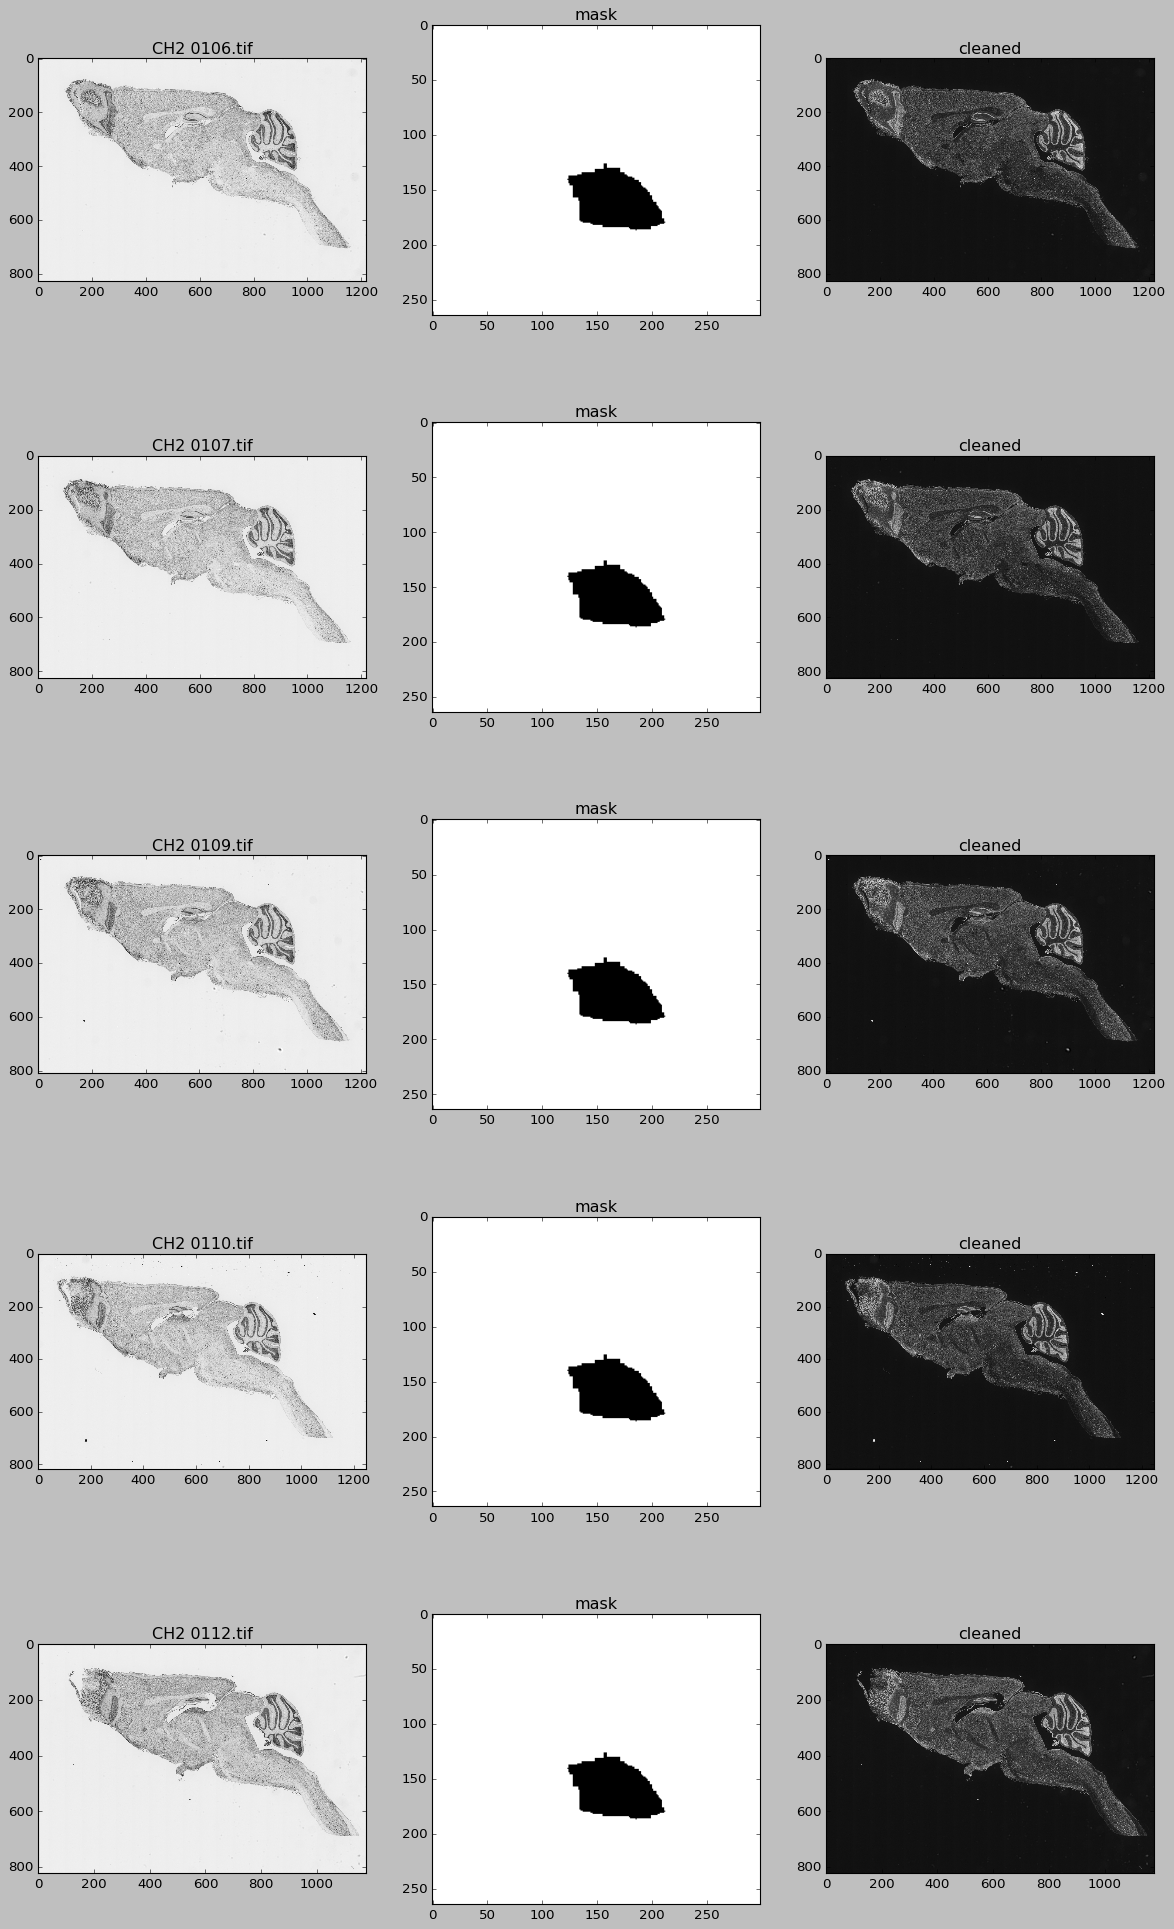

In [41]:
start, finish = (100,105)
#displays = masks[start:finish]
dins = img_inputs[start:finish]
douts = img_outputs[start:finish]
dmasks = masks[start:finish]
names = file_inputs[start:finish]

fig, ax = plt.subplots(nrows=len(names), ncols=3, sharex=False)
plt.style.use('classic')
i = 0
for filein,fileout, mask,name in zip(dins, douts, dmasks, names):
    ax[i,0].set_title('CH2 {}'.format(name))
    ax[i,0].imshow(filein, cmap="gray")
    ax[i,1].set_title('mask')
    ax[i,1].imshow(mask, cmap="gray")
    ax[i,2].set_title('cleaned')
    ax[i,2].imshow(fileout, cmap="gray")

    i += 1
# swap the 10 and the six below if the images are wider than height
fig.set_size_inches(np.array([18, 6 * len(names)]), forward=True)
plt.show()